In [4]:
# import librarires


# data analysis
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#make plot inline the notebook
%matplotlib inline

# print the time stamp
import time 
print(f"last update: {time.asctime()}")

last update: Wed Oct  9 12:09:06 2024


# Car Price Predcition

# 1. Problem Definition

Car prices vary significantly based on various factors such as engine size, fuel efficiency, brand, horsepower, mileage, and other technical or aesthetic features. Accurately predicting car prices can be highly valuable for consumers, dealers, and manufacturers. The goal is to build a predictive model that estimates the price of a car based on its features, helping stakeholders make informed decisions.

# 2. Data 

As it is a practice project , data is collected form kaggle
https://www.kaggle.com/datasets/zafarali27/car-price-prediction

In [19]:
data = pd.read_csv('data/car_price_prediction_.csv')

In [83]:
data.head(10)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
5,6,Audi,2019,2.4,Diesel,Automatic,246553,Like New,88969.76,Q7
6,7,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75,Q5
7,8,Tesla,2017,5.3,Hybrid,Automatic,83030,New,17381.19,Model Y
8,9,Honda,2023,5.7,Electric,Manual,120360,Like New,15905.62,Civic
9,10,Ford,2010,1.5,Electric,Automatic,135009,Like New,9560.22,Explorer


# 3. Features & 4. Evaluation

### Exploratory Data Analysis (EDA)

In [23]:
data.shape

(2500, 10)

In [25]:
data.dtypes

Car ID            int64
Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage           int64
Condition        object
Price           float64
Model            object
dtype: object

In [27]:
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [31]:
data.describe() # numerical data types only 

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


> summary: There are 2500 records and each has 9 features while the column name Price is target column

### handling null values

In [35]:
data.isna().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

there is no null values in out data

### handling data types

In [41]:
data.dtypes

Car ID            int64
Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage           int64
Condition        object
Price           float64
Model            object
dtype: object

In [43]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')


In [45]:
for column in categorical_columns:
    print(f"\n{column} - Unique Values and Counts:")
    print(data[column].value_counts())


Brand - Unique Values and Counts:
Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

Fuel Type - Unique Values and Counts:
Fuel Type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64

Transmission - Unique Values and Counts:
Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64

Condition - Unique Values and Counts:
Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

Model - Unique Values and Counts:
Model
Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
E-Class      89
Model Y      89
Fit          89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
GLC          80
Civic        80
X5           80
M

all these cols can be easily tranformed into numerical by using decoders 

### Visualizations

Bar chat of all categorical data types to visual the frequency

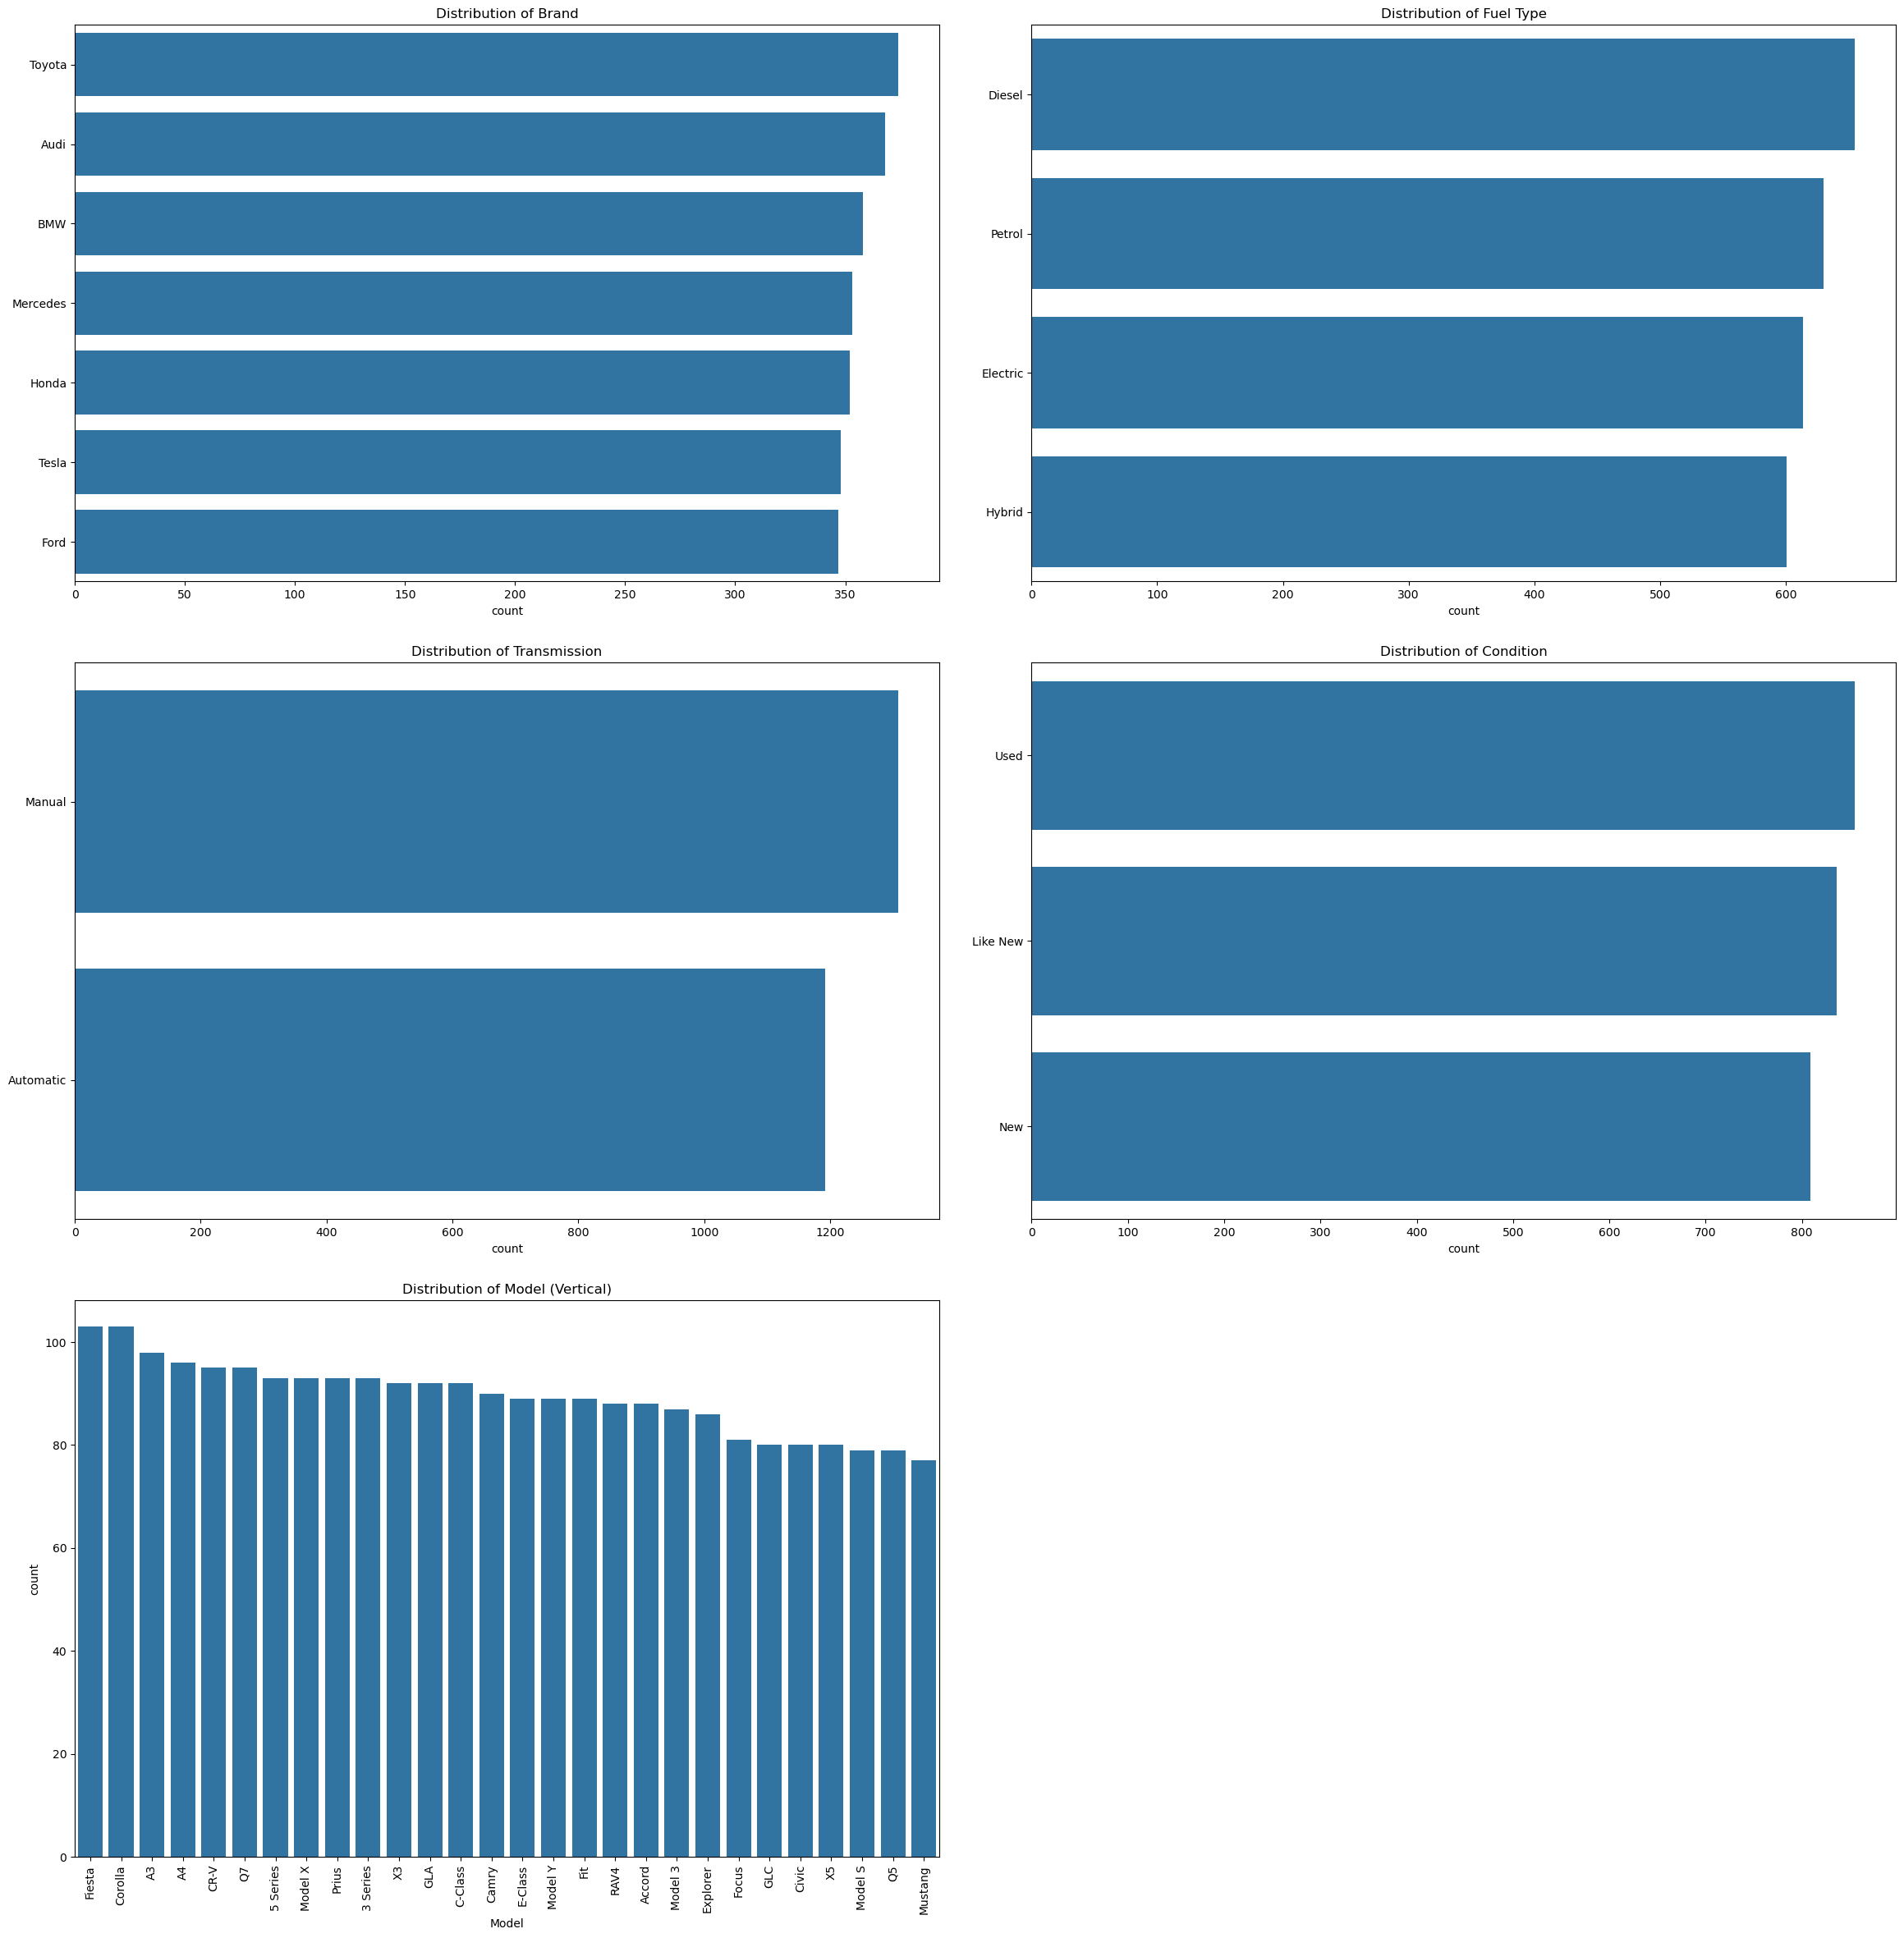

In [66]:
categorical_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))  
fig.tight_layout(pad=5.0) 

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    if column == 'Model':
        sns.countplot(x=column, data=data, order=data[column].value_counts().index, ax=axes[4])  
        axes[4].set_title('Distribution of Model (Vertical)')
        axes[4].tick_params(axis='x', rotation=90) 
    else:
        sns.countplot(y=column, data=data, order=data[column].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_ylabel('')  

if len(categorical_columns) < len(axes):
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

fig.savefig("images/Distribution of Categorical Data.png")

plt.show()


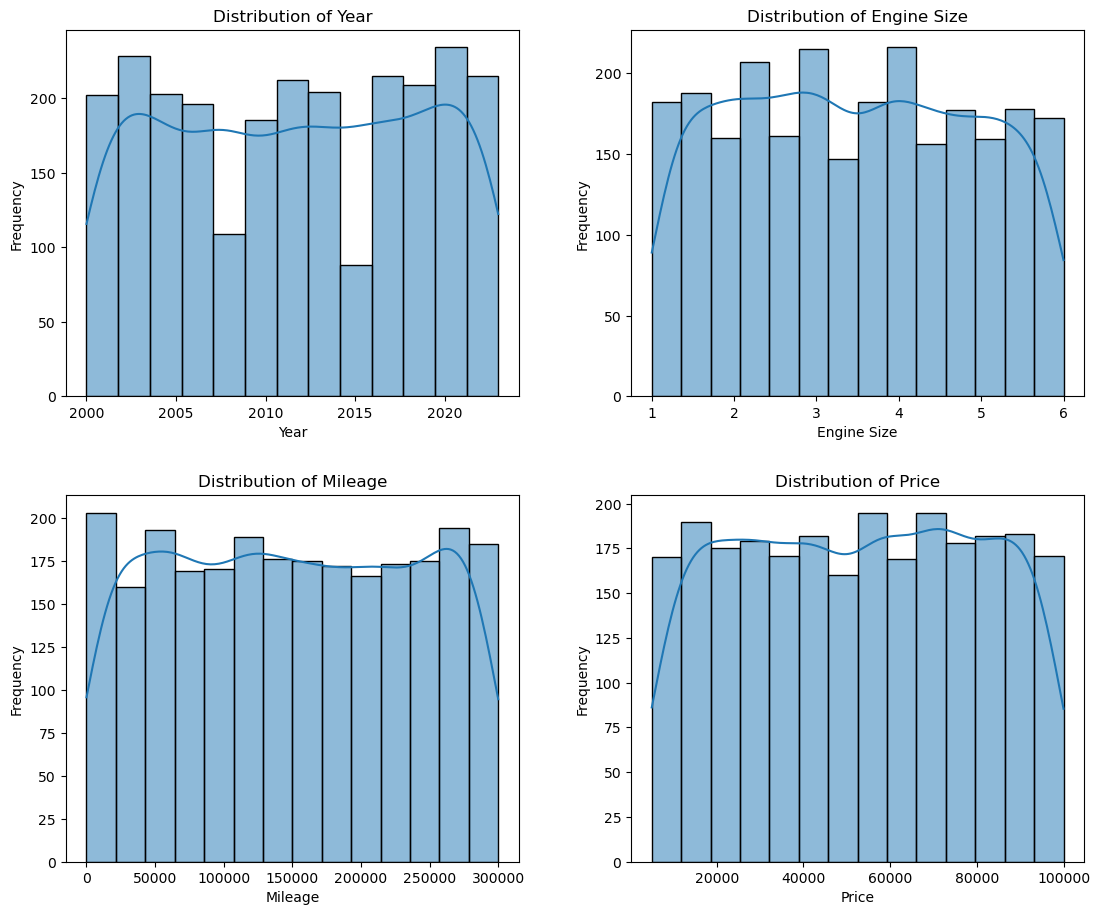

In [68]:
numerical_columns = ['Year', 'Engine Size', 'Mileage', 'Price']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Adjust size for better readability
fig.tight_layout(pad=5.0)  # Add padding between plots

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.savefig('images/numerical_distributions.png', bbox_inches='tight')

plt.show()


Boxplot for Price to check for outliers

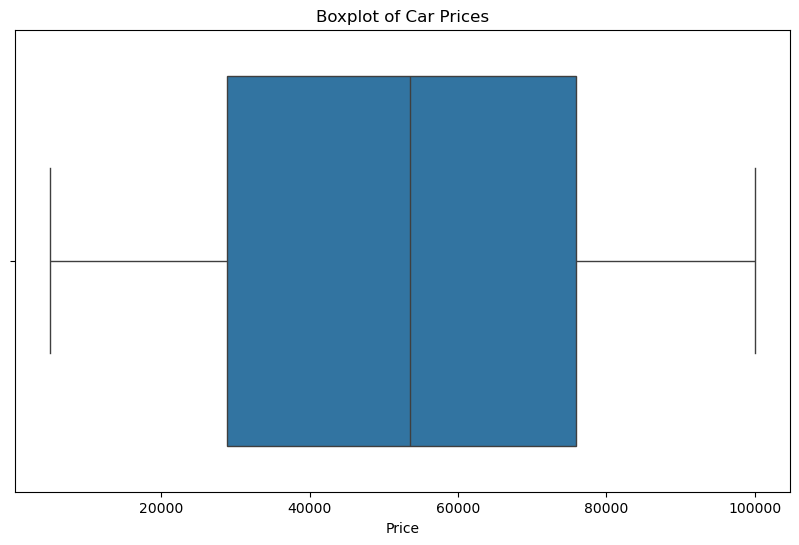

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Car Prices')
plt.savefig('images/Boxplot of Car Prices.png')
plt.show()

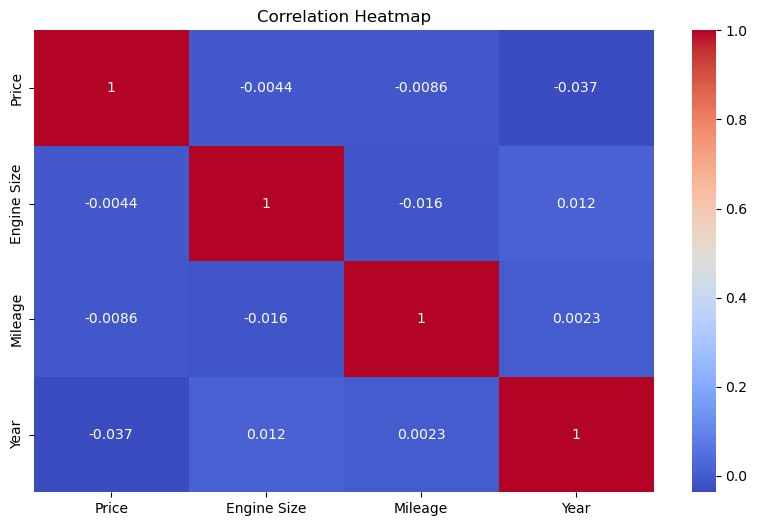

In [81]:
plt.figure(figsize=(10, 6))
corr_matrix = data[['Price', 'Engine Size', 'Mileage', 'Year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('images/Correlation Heatmap.png')
plt.show()
